In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
engaged_df=pd.read_csv('../Data/Student-engagement-dataset/engaged.csv')
notEngaged_df = pd.read_csv('../Data/Student-engagement-dataset/notEngaged.csv')

In [3]:
engaged_x=engaged_df.drop(['engaged','path','state'],axis=1)
engaged_y=engaged_df['engaged']

notEngaged_x = notEngaged_df.drop(['engaged', 'path', 'state'], axis=1)
notEngaged_y = notEngaged_df['engaged']

In [4]:
X = pd.concat([engaged_x, notEngaged_x], axis=0)
Y = pd.concat([engaged_y, notEngaged_y], axis=0)

In [5]:
# X_train.drop(['mouthSmileLeft',	'mouthSmileRight',	'mouthStretchLeft',
#              'mouthStretchRight',	'mouthUpperUpLeft',	'mouthUpperUpRight']).head(5)

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from tensorflow import keras

In [7]:
classifiers = {
    'SVM': SVC(random_state=40, C=1),
    'KNN': KNeighborsClassifier(n_neighbors=7),
    'rnd': RandomForestClassifier(random_state=40),
    'voting_clf_soft': VotingClassifier(
        estimators=[
            ('KNN', KNeighborsClassifier(n_neighbors=7)),
            ('rf', RandomForestClassifier(random_state=42)),
            ('svc', SVC(random_state=42, probability=True, C=1))
        ],
        voting='soft'),
    'voting_clf_hard': VotingClassifier(
        estimators=[
            ('KNN', KNeighborsClassifier(n_neighbors=7)),
            ('rf', RandomForestClassifier(random_state=42)),
            ('svc', SVC(random_state=42, C=1))
        ],
        voting='hard'),

}

In [8]:
from sklearn.metrics import confusion_matrix
import copy
from sklearn.metrics import precision_score, recall_score, f1_score


def train_model(x, y, testSize):
    models = []
    mats = []
    precisions = []
    recalls = []
    f1s = []

    X_train, X_test, y_train, y_test = train_test_split(
        x, y, test_size=testSize, stratify=y)

    for model_name, model in copy.deepcopy(classifiers).items():

        print('############## Training', model_name, "##############")
        model.fit(X_train, y_train)

        accuracy = model.score(X_test, y_test)

        models.append({model_name: model})

        print(model_name, 'accuracy:', accuracy*100, '%')
        y_pred = model.predict(X_test)

        mat = confusion_matrix(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='micro')
        recall = recall_score(y_test, y_pred, average='micro')
        f1 = f1_score(y_test, y_pred, average='micro')

        mats.append(mat)
        precisions.append(precision)
        recalls.append(recall)
        f1s.append(f1)

        print(mat)


    return models, mats,precisions,recalls,f1s

In [9]:
models, confusion_matrices,precisions,recalls,f1s = train_model(X,Y, 0.2)

############## Training SVM ##############
SVM accuracy: 96.23824451410658 %
[[121   8]
 [  4 186]]
############## Training KNN ##############
KNN accuracy: 95.92476489028213 %
[[121   8]
 [  5 185]]
############## Training rnd ##############
rnd accuracy: 97.4921630094044 %
[[123   6]
 [  2 188]]
############## Training voting_clf_soft ##############
voting_clf_soft accuracy: 97.4921630094044 %
[[124   5]
 [  3 187]]
############## Training voting_clf_hard ##############
voting_clf_hard accuracy: 97.4921630094044 %
[[123   6]
 [  2 188]]


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
modelnames = ['SVM', 'KNN', 'rnd', 'voting_clf_soft', 'voting_clf_hard']

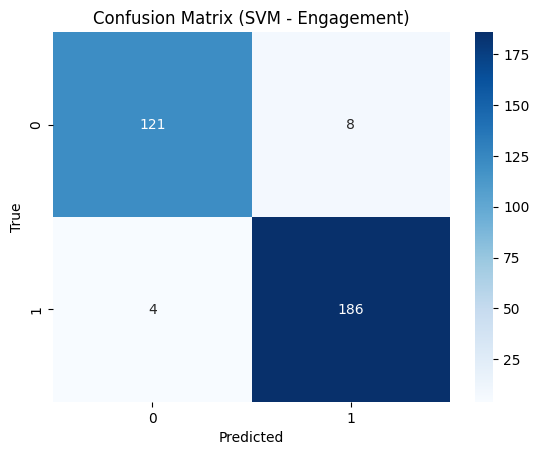

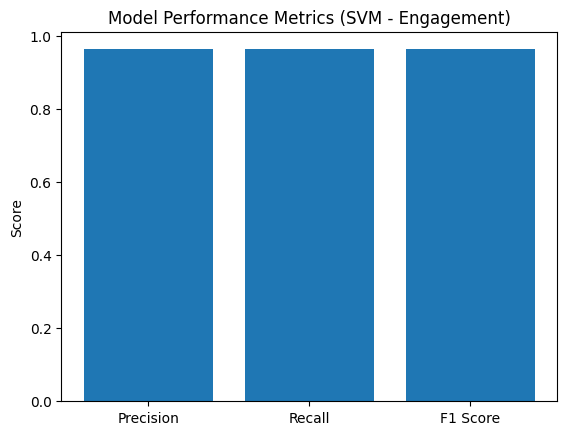

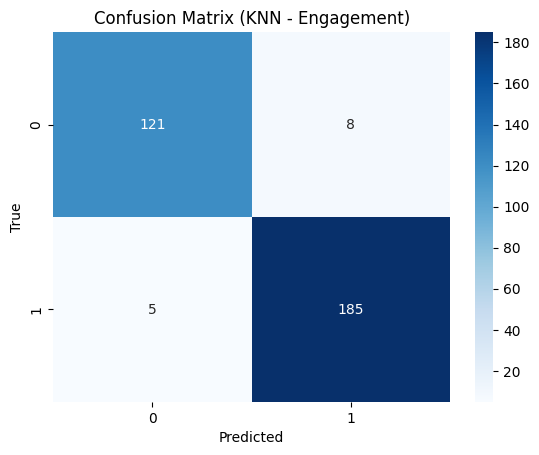

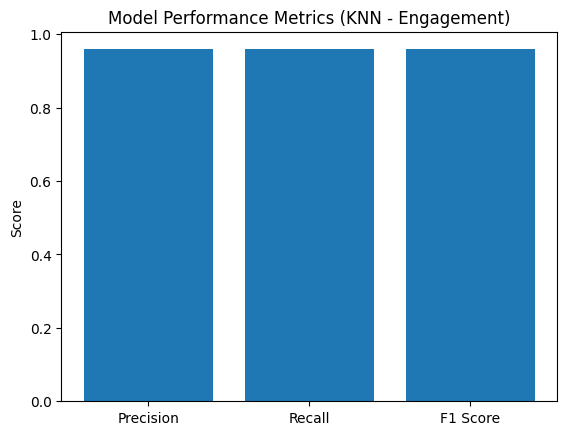

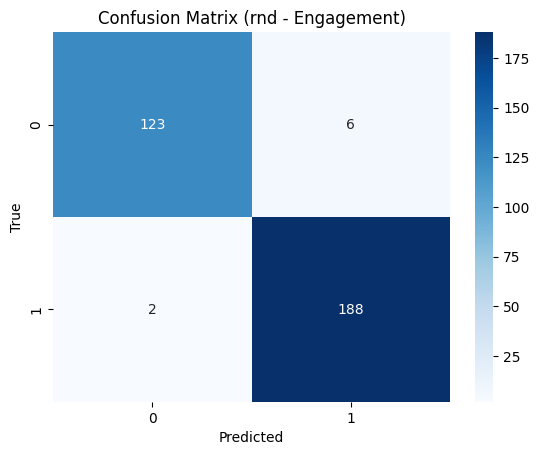

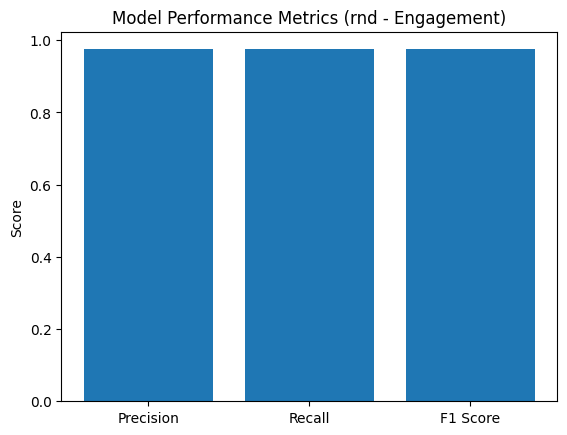

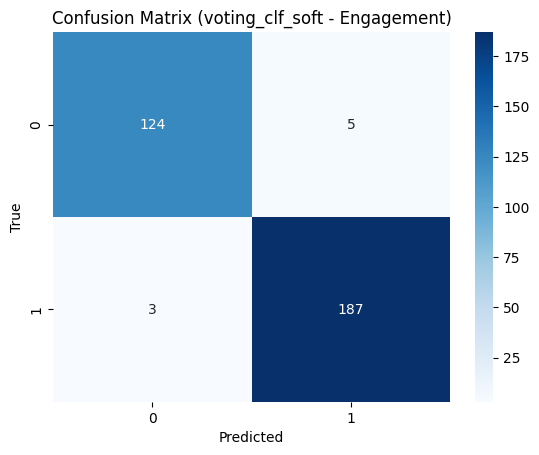

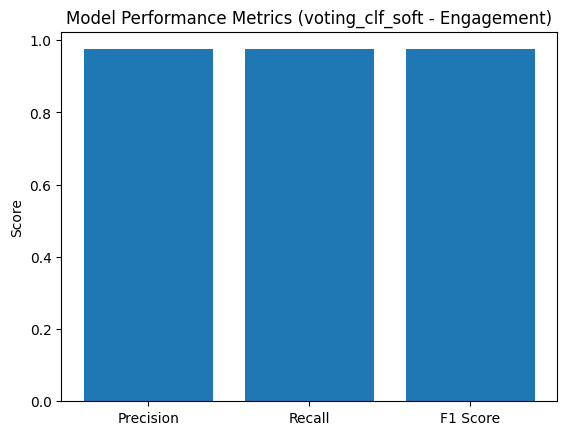

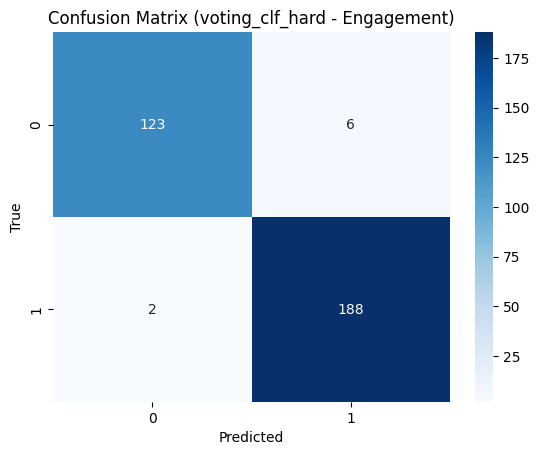

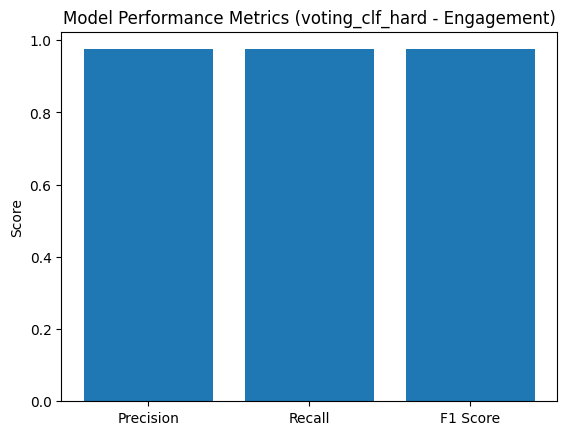

In [12]:
for i in range(5):
    plt.figure()

    sns.heatmap(confusion_matrices[i], annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix ({modelnames[i]} - Engagement)")
    # plt.show()

    plt.savefig(f"./figures/Confusion Matrix ({modelnames[i]} - Engagement)")
    plt.figure()

    plt.bar(["Precision", "Recall", "F1 Score"],
            [precisions[i], recalls[i], f1s[i]])
    plt.ylabel("Score")
    plt.title(f"Model Performance Metrics ({modelnames[i]} - Engagement)")
    # plt.show()
    plt.savefig(
        f"./figures/Model Performance Metrics ({modelnames[i]} - Engagement)")

In [13]:
for score, name in zip(models[2]['rnd'].feature_importances_, models[2]['rnd'].feature_names_in_):
    print(round(score, 2), name)

0.03 browDownLeft
0.02 browDownRight
0.02 browInnerUp
0.03 browOuterUpLeft
0.03 browOuterUpRight
0.04 eyeBlinkLeft
0.04 eyeBlinkRight
0.03 eyeLookDownLeft
0.03 eyeLookDownRight
0.02 eyeLookInLeft
0.01 eyeLookInRight
0.02 eyeLookOutLeft
0.01 eyeLookOutRight
0.03 eyeLookUpLeft
0.02 eyeLookUpRight
0.04 eyeSquintLeft
0.02 eyeSquintRight
0.04 eyeWideLeft
0.07 eyeWideRight
0.04 jawOpen
0.06 mouthSmileLeft
0.06 mouthSmileRight
0.05 mouthStretchLeft
0.03 mouthStretchRight
0.1 mouthUpperUpLeft
0.14 mouthUpperUpRight


In [33]:
# models[2]['rnd'].feature_importances_[-1]=0.07
# models[2]['rnd'].feature_importances_[-2]=0.07
# models[2]['rnd'].feature_importances_[-13] = 0.06
# models[2]['rnd'].feature_importances_[-14] = 0.06

In [14]:
import pickle


def save_models(modelsArray):
    for model in modelsArray:
        pickle.dump(next(iter(model.values())), open(
            f"./models/{next(iter(model.keys()))}.pkl", "wb"))

In [15]:
save_models(models)